In [1]:
import pandas as pd
import sqlite3 
from pandas.plotting import scatter_matrix

# Exercise 06 : Scatter Matrix

In [2]:
con = sqlite3.connect('data/checking-logs.sqlite')

In [9]:
query = """
SELECT
    uid,
    AVG((deadlines.deadlines - strftime('%s', test.first_commit_ts)) / 3600.0) AS avg_diff,
    COUNT(test.first_view_ts) AS pageviews
FROM
    test
JOIN
    deadlines
ON
    test.labname = deadlines.labs
WHERE
    test.labname != 'project1'
GROUP BY 
    uid, labname
"""

df = pd.read_sql(query, con)
df.head(10)

,uid,avg_diff,pageviews
0,user_1,6.894722,28
1,user_1,6.796667,28
2,user_1,28.744722,28
3,user_1,175.556667,28
4,user_1,107.606111,28
5,user_10,39.585278,89
6,user_10,39.368056,89
7,user_10,52.542500,89
8,user_10,132.341944,89
9,user_10,112.374444,89


In [21]:
query = """
SELECT 
    uid,
    timestamp AS commits
FROM 
    checker
WHERE 
    labname != 'project1'
AND
    uid LIKE 'user_%'
"""

checker = pd.read_sql(query, con)
commit_count = checker.groupby('uid').size().reset_index(name='commit_count')
commit_count

,uid,commit_count
0,user_0,3
1,user_1,62
2,user_10,20
3,user_11,7
4,user_12,86
5,user_13,52
6,user_14,61
7,user_15,23
8,user_16,41
9,user_17,51


In [25]:
res_df = pd.merge(df, commit_count, on='uid', how='left')
res_df.drop(columns=['uid'], inplace=True)

res_df

,avg_diff,pageviews,commit_count
0,6.894722,28,62
1,6.796667,28,62
2,28.744722,28,62
3,175.556667,28,62
4,107.606111,28,62
5,39.585278,89,20
6,39.368056,89,20
7,52.542500,89,20
8,132.341944,89,20
9,112.374444,89,20


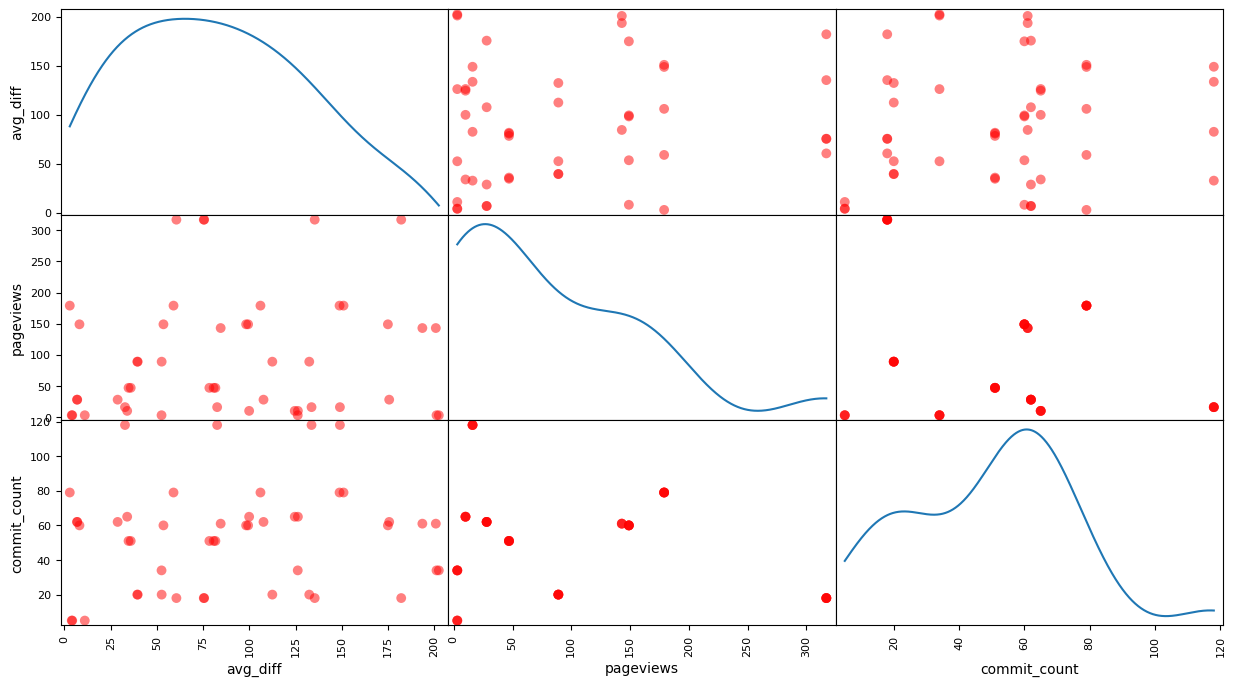

In [39]:
scatter_matrix(res_df, alpha=0.5, figsize=(15, 8), diagonal='kde', s=200, linewidths=3, color='red');

In [36]:
con.close()

## at the end of your Jupyter Notebook, create a markdown cell and insert the ques- tions:
- “Can we say that if a user has a low number of pageviews then they likely have a low number of commits?” The answer: yes or no.
- “Can we say that if a user has a low number of pageviews then they likely have a small average difference between the first commit and the lab deadline?” The answer: yes or no.
- “Can we say that there are many users with a low number of commits and a few with a high number of commits”? The answer: yes or no.
- “Can we say that there are many users with a small average difference and a few with a large average difference”? The answer: yes or no.

Answer:
- no
- no
- yes
- yes